In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

file = r"D:\moving_time_light.csv"
cols = [ 'Objeto L', 'Objeto NL', 'Basal NL', 'Basal L ']
novelty_GP = pd.read_csv(file, header=1, delimiter=';').iloc[:,2:6]
novelty_GP.columns = cols
cols = ['Objeto L (1)', 'Objeto NL (1)', 'Basal NL', 'Objeto NL (2)', 'Objeto L (2)', 'Basal L']
novelty_GO = pd.read_csv(file, header=1, delimiter=';').iloc[:,7:]
novelty_GO.columns = cols
compare = pd.read_csv(file, header=1, delimiter=';')[['GP total', 'GO total']]

compare.head()


,GP total,GO total
0,17.891624,0.911530
1,27.133374,0.016449
2,14.470341,0.418890
3,9.931514,0.459366
4,7.033075,0.013542


In [140]:
len(n_per_on)

NameError: name 'n_per_on' is not defined

c:\Users\Compras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Compras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Compras\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


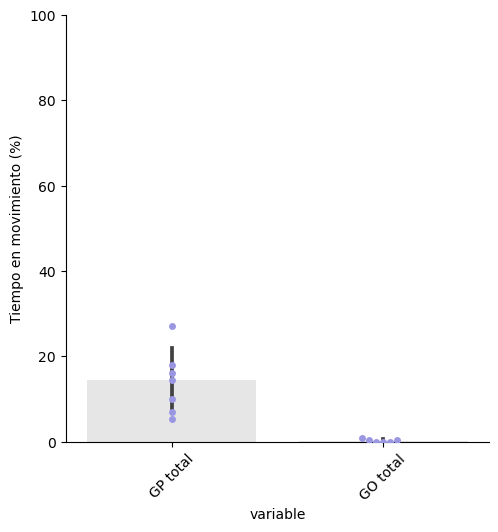

In [141]:
box = sns.catplot(data=compare.melt(), 
            x = 'variable',
            y = 'value',
            kind='bar',
            errorbar='sd',
            estimator='median',
            color='.9'
            )
points = sns.swarmplot(data=compare.melt(), x='variable', y='value', size=5, color='#9B96E1')
box.set(ylim=[0,100], ylabel='Tiempo en movimiento (%)')
box.tick_params('x', rotation=45)
box.figure.savefig('mov_time_GP_GO.svg', format='svg')


In [142]:
!pip install scikit_posthocs

In [164]:
import scikit_posthocs as sp
data = [novelty_GO[i] for i in novelty_GO.columns]
p_values = sp.posthoc_dunn(data)

print(p_values)

          1         2         3         4         5         6
1  1.000000  0.246592  0.813074  0.523181  0.924644  0.155964
2  0.246592  1.000000  0.356422  0.602911  0.287291  0.009953
3  0.813074  0.356422  1.000000  0.687694  0.887177  0.097876
4  0.523181  0.602911  0.687694  1.000000  0.586535  0.039664
5  0.924644  0.287291  0.887177  0.586535  1.000000  0.130188
6  0.155964  0.009953  0.097876  0.039664  0.130188  1.000000


In [144]:
novelty.columns

Index(['GP total', 'GP objeto L', 'GP objeto NL', 'GP basal NL', 'GP Basal L',
       'GO total', 'GO objeto (L)', 'GO objeto (NL)', 'GO basal NL',
       'GO objeto (mañana, NL)', 'GO objeto (mañana, L)', 'GO basal L'],
      dtype='object')

In [156]:
from scipy.stats import mannwhitneyu
res = mannwhitneyu(compare['GO total'][:-1], compare['GP total'])
res

MannwhitneyuResult(statistic=0.0, pvalue=0.0011655011655011655)

In [154]:
compare.iloc[-1,-1] =0

In [162]:
np.nanstd(compare['GO total'])

0.33009058230168764